### IMPORT LIBRARIES

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

### LOAD DATASET

In [2]:
data = pd.read_csv("suv_data.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Exploratory Data Analysis



*   Handling missing values if any
*   Apply label encoding to convert categorical data into numerical

*   Handle outliers
*   Visualization

In [3]:
print("Columns present in data = ",data.columns)

Columns present in data =  Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [4]:
print("Shape of Dataset ",data.shape)

Shape of Dataset  (400, 5)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [7]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### SINCE GENDER IS AN OBJECT THEREFORE CONVERTING USING LABEL ENCODER 

In [8]:
le = LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


### DATA VISUALISATION

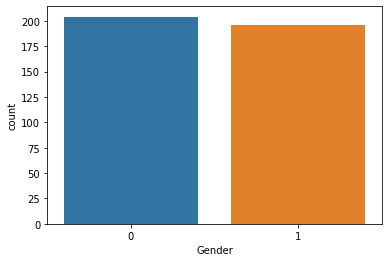

In [10]:
sb.countplot(x = "Gender", data = data);

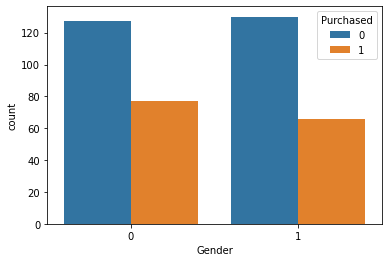

In [11]:
sb.countplot(x = "Gender", hue = "Purchased", data = data);

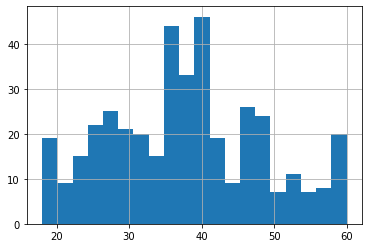

In [12]:
plt.grid()
plt.hist(x = data["Age"], bins = 20);

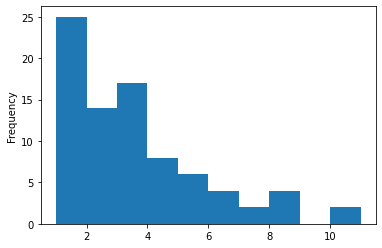

In [13]:
purch_0 = data[data["Purchased"] == 0].groupby(["EstimatedSalary"]).count()
purch_0["Purchased"].plot(kind = "hist")

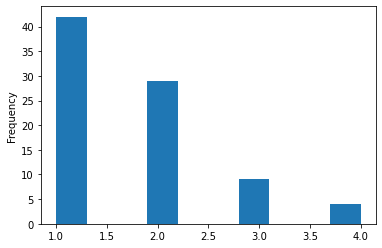

In [14]:
purch_1 = data[data["Purchased"] == 1].groupby(["EstimatedSalary"]).count()
purch_1["Purchased"].plot(kind = "hist")

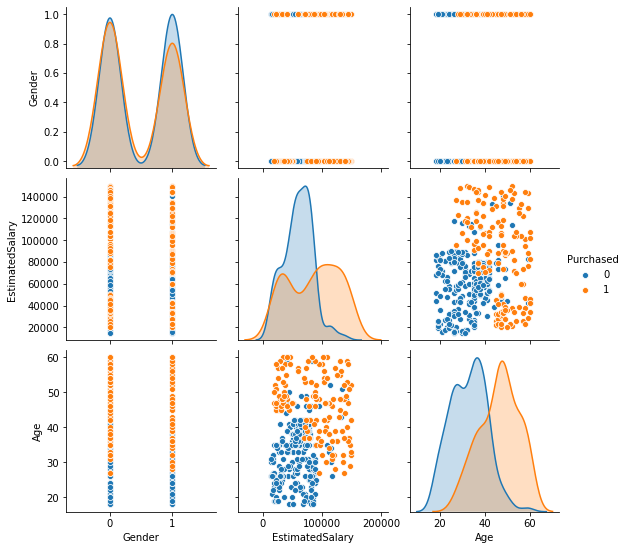

In [15]:
sb.pairplot(data = data, hue = "Purchased", vars = ["Gender", "EstimatedSalary", "Age"]);

### DATA SPLIT

In [16]:
features = data[['Gender','Age','EstimatedSalary']]
target = data['Purchased']

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.3, random_state = 1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(280, 3)
(120, 3)
(280,)
(120,)


### LOGISTIC REGRESSION

In [65]:
model = LogisticRegression(solver='liblinear')
model.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

### CONFUSION MATRIX AND EFFICIENCY

In [71]:
predict = model.predict(xtest)
confusion_matrix(ytest,predict)

array([[69,  3],
       [47,  1]], dtype=int64)

In [72]:
model.score(xtest,ytest)

0.5833333333333334

### K NEAREST NEIGHBORS

In [24]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

### PREDICTION

In [45]:
ypred = knn.predict(xtest)
print("Prediction given by model:\n", ypred)

Prediction given by model:
 [0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0]


### CONFUSION MATRIX AND EFFICIENCY

In [46]:
matrix = confusion_matrix(ytest, ypred)
print("Confusion matrix of model:\n", matrix)

Confusion matrix of model:
 [[67  5]
 [21 27]]


In [47]:
accuracy = accuracy_score(ytest, ypred)
print("Accuracy of model: {}%".format(accuracy*100))

Accuracy of model: 78.33333333333333%


### DECISION TREE

In [51]:
dt = DecisionTreeClassifier()

In [53]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [54]:
dt.score(xtest, ytest)

0.8416666666666667

In [55]:
y_pred  = dt.predict(xtest)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [61]:
results = pd.DataFrame({'Actual' : ytest, 'Predicted' : y_pred})
results

,Actual,Predicted
398,0,0
125,0,0
328,1,0
339,1,1
172,0,1
...,...,...
91,0,0
322,0,0
248,0,0
186,0,0


In [56]:
accuracy_score(ytest, y_pred)

0.8416666666666667

[Text(705.2500000000001, 1041.9, 'Age <= 42.5\ngini = 0.448\nsamples = 280\nvalue = [185, 95]\nclass = 0'),
 Text(358.05000000000007, 951.3000000000001, 'EstimatedSalary <= 89500.0\ngini = 0.272\nsamples = 209\nvalue = [175, 34]\nclass = 0'),
 Text(195.3, 860.7, 'Age <= 36.5\ngini = 0.055\nsamples = 177\nvalue = [172, 5]\nclass = 0'),
 Text(151.90000000000003, 770.1, 'gini = 0.0\nsamples = 119\nvalue = [119, 0]\nclass = 0'),
 Text(238.70000000000005, 770.1, 'EstimatedSalary <= 83500.0\ngini = 0.158\nsamples = 58\nvalue = [53, 5]\nclass = 0'),
 Text(195.3, 679.5, 'EstimatedSalary <= 67500.0\ngini = 0.131\nsamples = 57\nvalue = [53, 4]\nclass = 0'),
 Text(151.90000000000003, 588.9, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = 0'),
 Text(238.70000000000005, 588.9, 'EstimatedSalary <= 70500.0\ngini = 0.245\nsamples = 28\nvalue = [24, 4]\nclass = 0'),
 Text(195.3, 498.29999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(282.1, 498.29999999999995, 'Age <= 40.5\

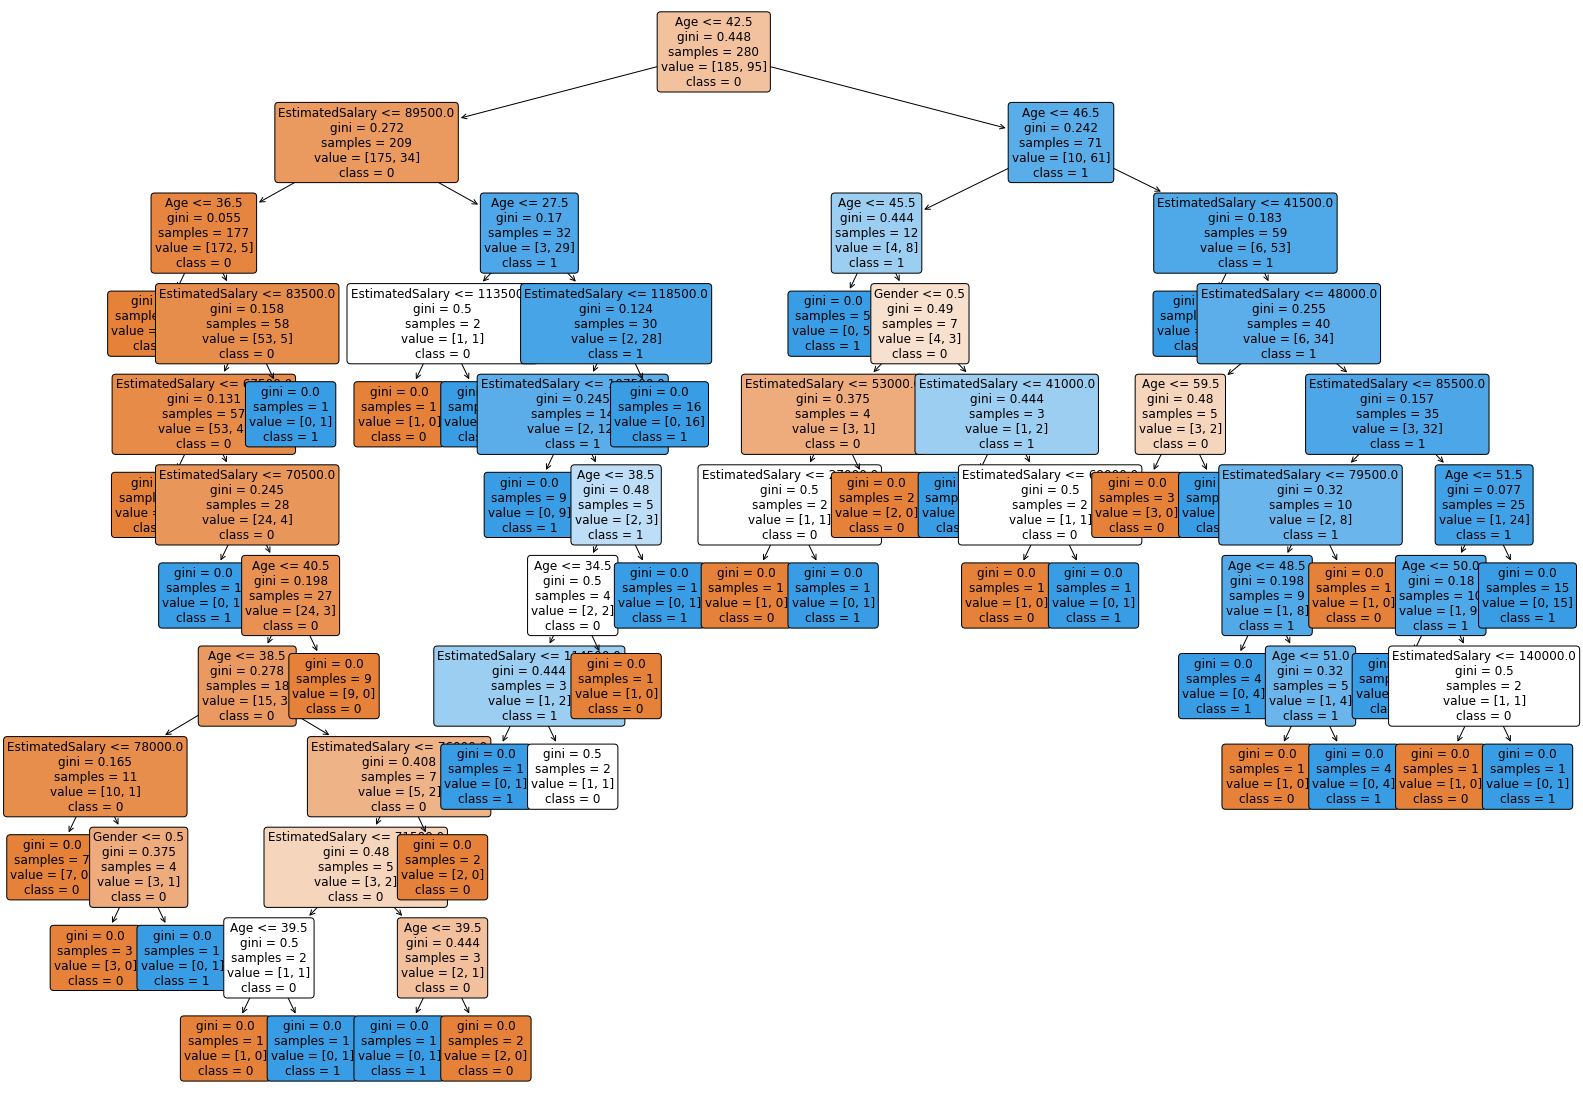

In [60]:
plt.figure(figsize=(28,20))

tree.plot_tree(dt, feature_names=xtrain.columns, class_names=['0','1'], filled=True, rounded=True, fontsize=12)